# Importing Important Libraries

In [1]:
import pytesseract
import cv2
import numpy as np
from PIL import Image
import re
import csv
import pandas as pd
import gspread
from google.oauth2.service_account import Credentials

import warnings 
warnings.filterwarnings('ignore')

# Pytesseract Path
### install Pytesseract to your computer

In [2]:
# give path where the pytesseract is present in your system and \tesseract.exe
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\Sandeep\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

# Image Loading

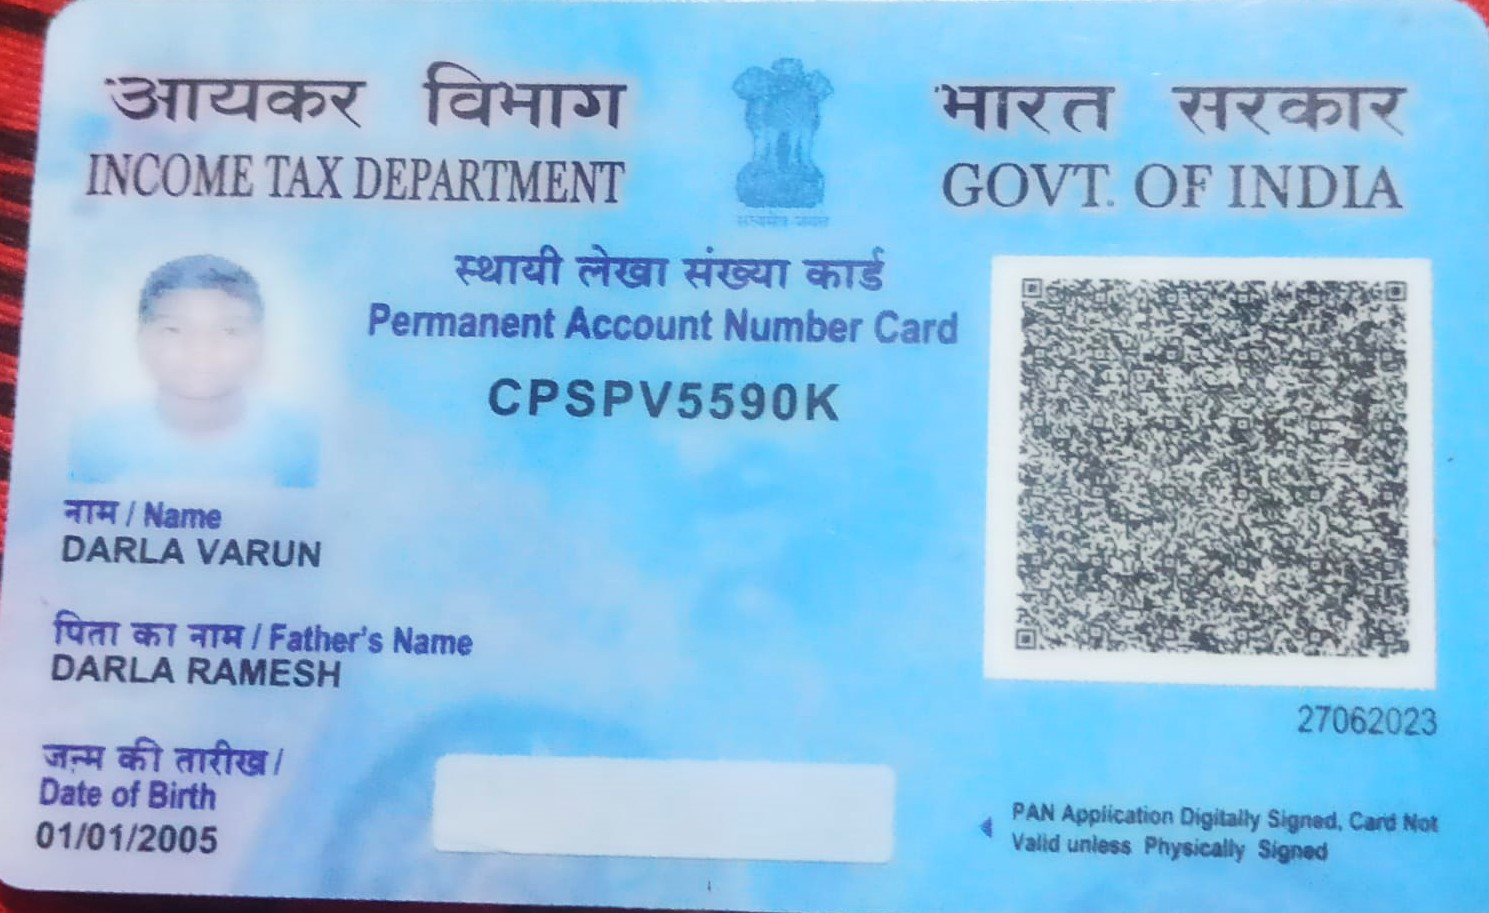

In [3]:
image_path = 'pan.jpg'


image = Image.open(image_path)
image

# Extracting text

In [4]:
text = pytesseract.image_to_string(image,lang='eng')

print(text)

Ssiraeex faant Ata aa
INCOME TAX DEPARTMENT GOVT. OF INDIA

gle, caret CET ASAT HTS

- Permanent Account Number Card

CPSPV5590K
aT / Name
DARLA VARUN
frat aT ATH / Father's Name eas FSP
DARLA RAMESH
27062023
WHS) aréter/
Date of Birth 4. PAN Application Digitally Signed, Card Not
Valid unless Physically Signed

01/01/2005
oi a eee



# Name Extraction

In [5]:
name_pattern =r"(?i)name\s*(?i)(\b[A-Z][a-z]+\s+[A-Z][a-z]+\b)"
#"(?i)name\s*(?i)([^\n]*)"

matches = re.findall(name_pattern,text)

if matches:
    name = matches[0]
    print("Name:", name)
else:
    print("No name found.")


Name: DARLA VARUN


# Date of Birth 

In [6]:
dob = "\d{2}\W\d{2}\W\d{4}"

match = re.findall(dob,text)

if match:
    dob = match[0]
    print('Dob : ',dob)
else:
    print('notfound')

Dob :  01/01/2005


# Father Name

In [7]:
Father ="(?i)father's name\s[a-z \S*]*\s+[a-zA-Z]*\s*[A-Z]*"

match = re.findall(Father,text)

if match:
    father_name = match[0]
    print("Father_name : ",father_name) 
else:
    print("Father's name not found.")

Father_name :  Father's Name eas FSP
DARLA RAMESH


# Pan 

In [8]:
pan = r"(?i)[A-Z]{5}\d{4}[A-Z]{1}"

match = re.findall(pan,text)

if match:
    pan = match[0]
    print('Pan : ',match)
else:
    print('notfound')

Pan :  ['CPSPV5590K']


# Aadhar

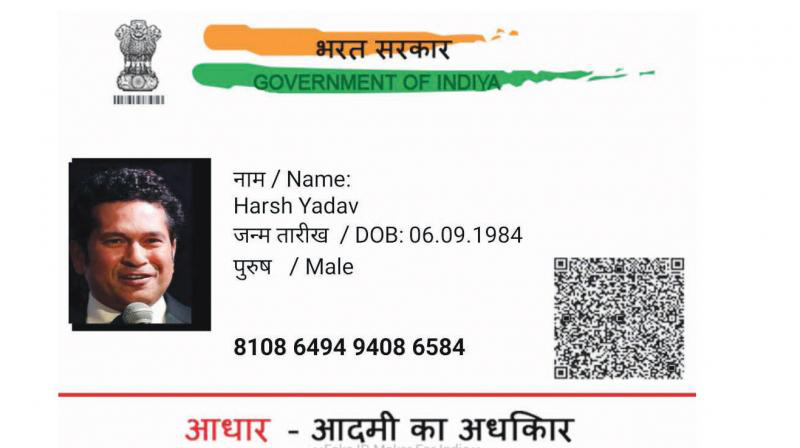

In [9]:
adhar = 'fake.jpeg'

image = Image.open(adhar)
display(image)

In [10]:
txt = pytesseract.image_to_string(image,lang='eng')

txt

'ara / Name:\nHarsh Yadav\nwr ara / DOB: 06.09.1984\n\nges / Male\n\n8108 6494 9408 6584\n\n'

In [11]:
aadhar = r"\d{4}\s\d{4}\s\d{4}"

matches = re.findall(aadhar,txt)

if matches:
    aadhar_number = matches[0]
    print('aadhar : ',matches)
else:
    print('Not found')

aadhar :  ['8108 6494 9408']


# Saving in Csv File

In [12]:
data = {
    "Name": name,
    "Dob": dob,
    "Father Name": father_name,
    "Pan": pan,
    "aadhar": aadhar_number
}

csv_file = "extracted.csv" 
with open(csv_file, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=data.keys())
    writer.writeheader()
    writer.writerow(data)
    
print(f"Success: Data saved to {csv_file}")


Success: Data saved to extracted.csv


# Automate csv to google sheets

In [13]:
csv_file_path = "extracted.csv"
df = pd.read_csv(csv_file_path)

# Google Sheets API setup
scope = ["https://www.googleapis.com/auth/spreadsheets", "https://www.googleapis.com/auth/drive"]
creds = Credentials.from_service_account_file(r"C:\Users\Sandeep\Downloads\panauto-352b6e5de84c.json", scopes=scope)
client = gspread.authorize(creds)

# Create a new Google Sheet
spreadsheet = client.create("Uploaded CSV Sheet")
spreadsheet.share('sandeepkakarla.apss@gmail.com', perm_type='user', role='writer')

# Select the first worksheet
worksheet = spreadsheet.get_worksheet(0)

# Upload DataFrame to Google Sheets
worksheet.update([df.columns.values.tolist()] + df.values.tolist())

print("CSV uploaded to Google Sheets successfully!")


CSV uploaded to Google Sheets successfully!
